In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

### Functions

In [2]:
#Softmax Function
def softmax(u):
    return np.exp(u) / np.sum(np.exp(u),axis=0)

In [3]:
#Cross-Entropy Loss Function 
def multiclass_cross_entropy(p,q):
    return -np.vdot(p,np.log(q))

In [4]:
#Objective Function
def L(beta,X,y):
    N = X.shape[0]
    s = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        #Prediction Function
        u = beta @ xiHat
        yi_pred = softmax(u)
        
        #Calculating the loss
        s += multiclass_cross_entropy(yi,yi_pred)
    
    #Returns the average loss 
    return s / N 

In [5]:
#Calculate Gradient
def grad_L(beta,X,y):
    N = X.shape[0]
    grad = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        u = beta @ xiHat 
        yi_pred = softmax(u)
        
        grad = grad + np.outer((softmax(u) - yi), xiHat)
        
    return grad / N 

In [6]:
#Logistic Regression using Gradient Descent
def MultiLogReg_GradientDescent(X,y):
    num_iters = 100
    alpha = 3
    beta = np.zeros((K,d+1))
    
    L_vals = np.zeros(num_iters)
    for t in range(num_iters):
        L_vals[t] = L(beta,X,y)
        
        if t % 20:
            print('Loss : '+ str(L_vals[t]))
            
        beta = beta - alpha * grad_L(beta,X,y)
    
    return beta, L_vals

In [7]:
#Function to predict labels
def make_predictions(beta,X):
    N = X.shape[0]
    
    predictions = []
    
    for i in range(N):
        xiHat = X[i]
        yi_pred = softmax(beta @ xiHat)
        
        k = np.argmax(yi_pred)
        predictions.append(k)
        
    return np.array(predictions)

### Implementation

In [60]:
#Loading in the dataset
dataset = sk.datasets.load_iris()
X = dataset.data
y = dataset.target

N = len(y)
K = len(np.unique(y))

#One-hot Encoding 
y_onehot = pd.get_dummies(y).values

In [61]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y_onehot,test_size=0.2)

In [62]:
N_train = X_train.shape[0] #Training Set : Number of rows in X_train
N_val = X_train.shape[0] #Test Set : Number of rows in X_train 
d = X_train.shape[1] #Number of columns in X_train 

In [63]:
#Normalize Data
X_train = (X_train - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)
X_test = (X_test - np.mean(X_train,axis=0)) / np.std(X_train,axis=0) 

In [64]:
#Insert Leading 1's to create the augmented matrix 
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [65]:
beta, L_vals = MultiLogReg_GradientDescent(X_train,y_train)

Loss : 0.39735440859663773
Loss : 0.3221644931264724
Loss : 0.2910598870175069
Loss : 0.26662194602135764
Loss : 0.24865598659142016
Loss : 0.23402365719008428
Loss : 0.22182719722857414
Loss : 0.21147093121728683
Loss : 0.20256066834731373
Loss : 0.19479928676361932
Loss : 0.1879580520801007
Loss : 0.1818612080975299
Loss : 0.17637456868092707
Loss : 0.17139575063662177
Loss : 0.1668460960967712
Loss : 0.1626643688734215
Loss : 0.15880207479050074
Loss : 0.15522009694760522
Loss : 0.15188631520692666
Loss : 0.14586025079158157
Loss : 0.1431258693883887
Loss : 0.14055399166215324
Loss : 0.1381299793497625
Loss : 0.1358409819393913
Loss : 0.13367565156834785
Loss : 0.13162391611585197
Loss : 0.12967679578132527
Loss : 0.12782625281304802
Loss : 0.12606506697647538
Loss : 0.124386731338513
Loss : 0.12278536431919611
Loss : 0.12125563493265203
Loss : 0.1197926988376828
Loss : 0.11839214333068973
Loss : 0.11704993979638037
Loss : 0.11576240242234302
Loss : 0.11452615220762699
Loss : 0.1133

Text(0, 0.5, 'Objective Function Value')

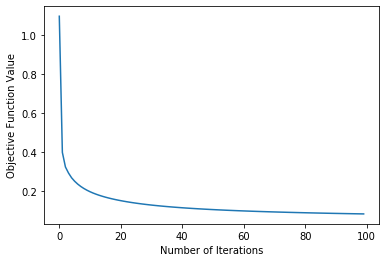

In [88]:
plt.plot(L_vals)
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')

In [67]:
y_pred = make_predictions(beta,X_test)

In [75]:
y_pred

array([1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

There are 8 labels for class 0 in the truth labels, but the prediction function did not even predict one label of classs 0. 
The prediction function labels most classes as belonging to class 2. For the most part, it predicts all the labels belonging to this class correctly except for 1 occasion. While only predicting one correct label for class 1. 